Cargar los paquetes importantes de analysis

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import mdtraj as md
import MDAnalysis as mda
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import MDAnalysis as mda
import mdtraj as md
from matplotlib.ticker import MaxNLocator

Cargamos el archivo con los datos

In [8]:
data = pd.read_csv('./DOCKING_MIN/DOCKING_METRICS_ANALYSIS.csv')
data.head()

,STRUCTURE,DISTANCE_SER,ENERGY,MET,DISTANCE_MET,TYR,DISTANCE_TYR,DIHEDRAL,CONFORMATION,VARIANT,TEMPERATURE,DOCKING
0,resultsDocking_TSPETase_303_C456-f6688-s16_PET...,2.826,-4.376,YES,3.013,YES,2.803,47.824,undefined,TSPETase,303,7
1,resultsDocking_WT_303_C236-f4111-s28_PET_dimer...,2.841,-5.124,YES,2.939,YES,2.834,51.101,gauche,WT,303,5
2,resultsDocking_S214H_315_C3-f70-s20_PET_dimer_...,2.842,-4.319,YES,2.940,YES,2.845,77.065,gauche,S214H,315,16
3,resultsDocking_TSPETase_315_C104-f4723-s24_PET...,2.845,-5.751,YES,2.974,YES,2.870,80.643,gauche,TSPETase,315,12
4,resultsDocking_S214H_315_C3-f70-s20_PET_dimer_...,2.846,-4.325,YES,2.993,YES,2.831,65.709,gauche,S214H,315,15


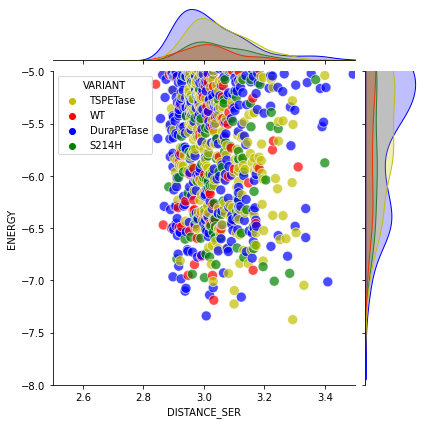

In [3]:
g = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 303)  & (data["DOCKING"] <= 20) ] , x="DISTANCE_SER" , y="ENERGY", hue="VARIANT", palette=dict( DuraPETase="b",S214H = 'g', WT = 'r', TSPETase = 'y'),xlim=(2.5, 3.5), ylim=(-8, -5), s=100, alpha=.7 )   


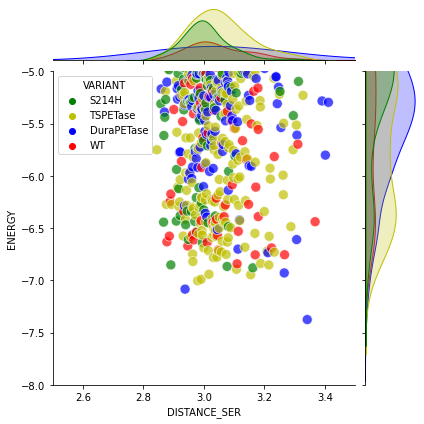

In [4]:
g = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315)  & (data["DOCKING"] <= 20) ] , x="DISTANCE_SER" , y="ENERGY", hue="VARIANT", palette=dict( DuraPETase="b",S214H = 'g', WT = 'r', TSPETase = 'y'),xlim=(2.5, 3.5), ylim=(-8, -5), s=100, alpha=.7 )   


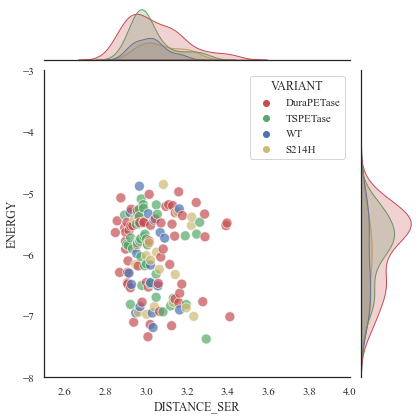

In [66]:
g = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 303) & (data['DOCKING'] <= 3)] , 
                  x="DISTANCE_SER" , y="ENERGY", hue="VARIANT", palette=dict( DuraPETase="r",S214H = 'y', WT = 'b', TSPETase = 'g'),xlim=(2.5, 4), ylim=(-8, -3), s=100, alpha=.7 )   


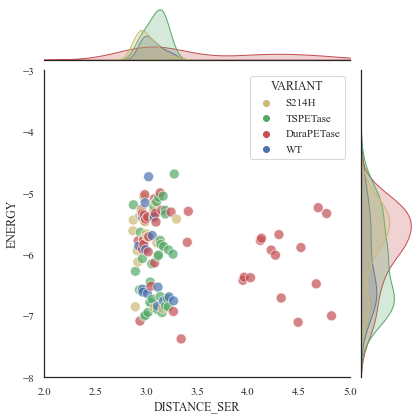

In [73]:
g = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315) & (data['DOCKING'] <= 3)] , 
                  x="DISTANCE_SER" , y="ENERGY", hue="VARIANT", palette=dict( DuraPETase="r",S214H = 'y', WT = 'b', TSPETase = 'g'),xlim=(2, 5), ylim=(-8, -3), s=100, alpha=.7 )   


In [77]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

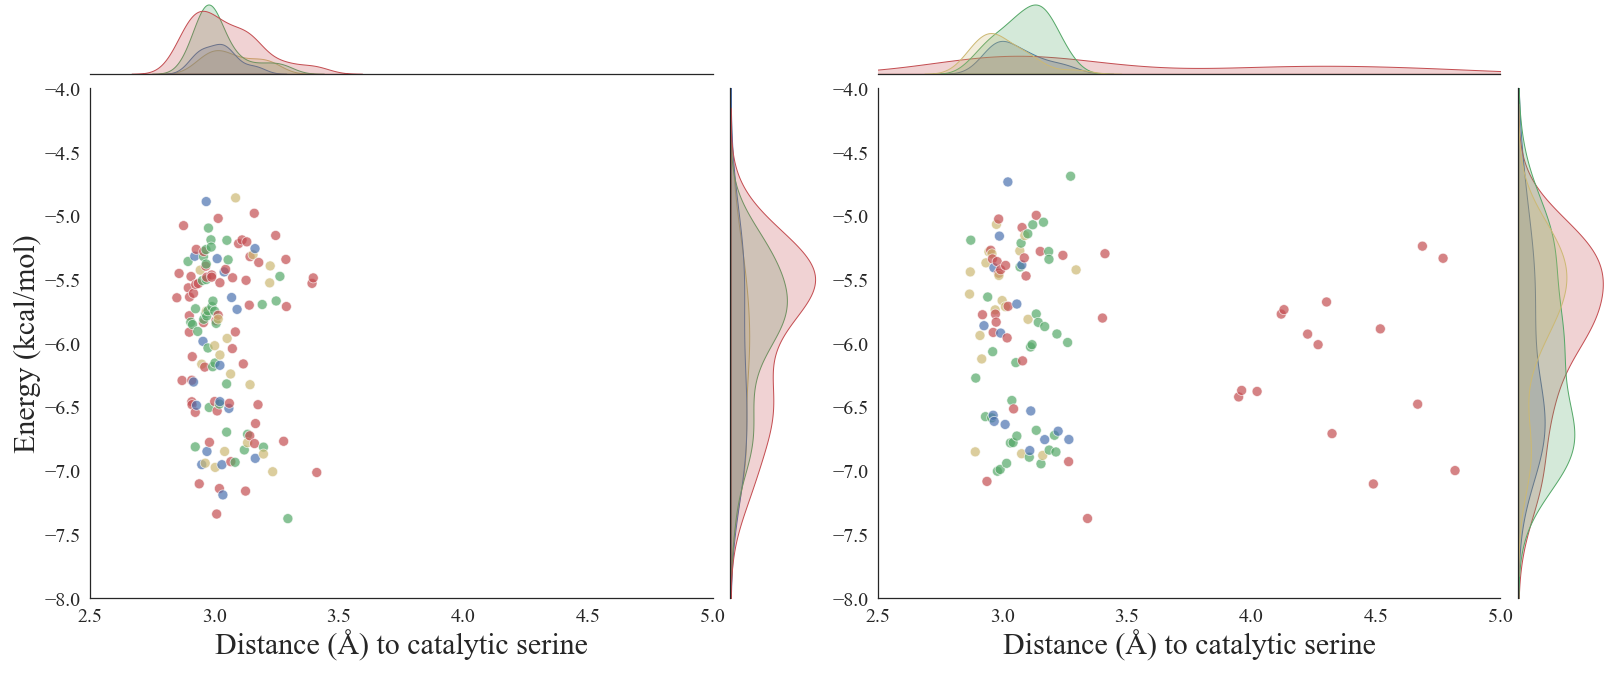

In [119]:
#OUTPUT JOINTPLOT WITH ALL DATA:
#import SeabornFig2Grid as sfg

fig = plt.figure(figsize=(22.5,18))

sns.set_style('white')

plt.rcParams["font.family"] = "Times New Roman"

gs = gridspec.GridSpec(2, 2)

g1 = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 303) & (data['DOCKING'] <= 3)] , 
                  x="DISTANCE_SER" , y="ENERGY", hue="VARIANT", palette=dict( DuraPETase="r",S214H = 'y', WT = 'b', TSPETase = 'g'),xlim=(2.5, 5), ylim=(-8, -4), s=100, alpha=.7, legend=False )   
g1.set_axis_labels('Distance (Å) to catalytic serine', 'Energy (kcal/mol)', fontsize=30)
g1.ax_joint.tick_params(labelsize=20)
g2 = g = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315) & (data['DOCKING'] <= 3)] , 
                  x="DISTANCE_SER" , y="ENERGY", hue="VARIANT", palette=dict( DuraPETase="r",S214H = 'y', WT = 'b', TSPETase = 'g'),xlim=(2.5, 5), ylim=(-8, -4), s=100, alpha=.7, legend=False)   
g2.set_axis_labels('Distance (Å) to catalytic serine', '', fontsize=30)
g2.ax_joint.tick_params(labelsize=20)

mg0 = SeabornFig2Grid(g1, fig, gs[1,0])
mg1 = SeabornFig2Grid(g2, fig, gs[1,1])
#mg2 = SeabornFig2Grid(g2, fig, gs[2,0])
#mg3 = SeabornFig2Grid(g5, fig, gs[2,1])

#mg3 = sfg.SeabornFig2Grid(g3, fig, gs[2])


gs.tight_layout(fig)
#gs.update(top=0.7)


#TITLE OF PLOT:
#plt.title('PETase variants',fontweight='bold')

#SAVE IMAGES IN PNG FORMAT IN THE PLOTS FOLDER:
#os.system('mkdir PLOTS')
plt.savefig("Energias.png")


plt.show(block=True)

In [134]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
data[ ((data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315) & (data['DOCKING'] <= 3) & (data['VARIANT'] == 'DuraPETase') & (data['DISTANCE_SER'] > 4.8))]

C:\Users\jose_\anaconda3\envs\MD_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,STRUCTURE,DISTANCE_SER,ENERGY,MET,DISTANCE_MET,TYR,DISTANCE_TYR,DIHEDRAL,CONFORMATION,VARIANT,TEMPERATURE,DOCKING
5477,resultsDocking_DuraPETase_315_C125-f2800-s19_PET_dimer_003_mini.yob,4.818,-6.999,YES,3.017,YES,3.403,25.228,undefined,DuraPETase,315,3


In [22]:
def conformation_comparison(data):
    ## Para 303K
    data_trans_WT_303 = data[(data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'WT') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'trans')]  
    data_trans_S214H_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'S214H') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'trans')]  
    data_trans_TSPETase_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'TSPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'trans')]  
    data_trans_DuraPETase_303 = data[  (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'DuraPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'trans')]  
    data_gauche_WT_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'WT') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'gauche')]  
    data_gauche_S214H_303 = data[  (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'S214H') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'gauche')]  
    data_gauche_TSPETase_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'TSPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'gauche')]  
    data_gauche_DuraPETase_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'DuraPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'gauche')]  
    data_un_WT_303 = data[  (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'WT') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == '303') & (data['CONFORMATION'] == 'undefined')]  
    data_un_S214H_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'S214H') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'undefined')]  
    data_un_TSPETase_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'TSPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'undefined')]  
    data_un_DuraPETase_303 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'DuraPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 303) & (data['CONFORMATION'] == 'undefined')]  
    ## Para 315K
    data_trans_WT_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'WT') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'trans')]  
    data_trans_S214H_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'S214H') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'trans')]  
    data_trans_TSPETase_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'TSPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'trans')]  
    data_trans_DuraPETase_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'DuraPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'trans')]  
    data_gauche_WT_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'WT') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'gauche')]  
    data_gauche_S214H_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'S214H') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'gauche')]  
    data_gauche_TSPETase_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'TSPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'gauche')]  
    data_gauche_DuraPETase_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'DuraPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'gauche')]  
    data_un_WT_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'WT') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'undefined')]  
    data_un_S214H_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'S214H') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'undefined')]  
    data_un_TSPETase_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'TSPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'undefined')]  
    data_un_DuraPETase_315 = data[ (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data["VARIANT"] == 'DuraPETase') & (data['DISTANCE_SER'] <= 3.5) & (data['TEMPERATURE'] == 315) & (data['CONFORMATION'] == 'undefined')]   ## generamos la DataFrame
    data = {'Variants': ['WT', 'S214H', 'TSPETase', 'DuraPETase', 'WT', 'S214H', 'TSPETase', 'DuraPETase', 'WT', 'S214H', 'TSPETase', 'DuraPETase', 'WT', 'S214H', 'TSPETase', 'DuraPETase', 'WT', 'S214H', 'TSPETase', 'DuraPETase', 'WT', 'S214H', 'TSPETase', 'DuraPETase'],
            'Conformations': ['TRANS', 'TRANS', 'TRANS', 'TRANS', 'GAUCHE', 'GAUCHE', 'GAUCHE','GAUCHE', 'UNDEFINED', 'UNDEFINED', 'UNDEFINED', 'UNDEFINED', 'TRANS', 'TRANS', 'TRANS', 'TRANS', 'GAUCHE', 'GAUCHE', 'GAUCHE','GAUCHE', 'UNDEFINED', 'UNDEFINED', 'UNDEFINED', 'UNDEFINED'],
            'Number of Structures': [len(data_trans_WT_303), len(data_trans_S214H_303), len(data_trans_TSPETase_303), len(data_trans_DuraPETase_303), len(data_gauche_WT_303), len(data_gauche_S214H_303), len(data_gauche_TSPETase_303), len(data_gauche_DuraPETase_303),
                                    len(data_un_WT_303), len(data_un_S214H_303), len(data_un_TSPETase_303), len(data_un_DuraPETase_303), len(data_trans_WT_315), len(data_trans_S214H_315), len(data_trans_TSPETase_315), len(data_trans_DuraPETase_315), len(data_gauche_WT_315), len(data_gauche_S214H_315), len(data_gauche_TSPETase_315), len(data_gauche_DuraPETase_315),
                                    len(data_un_WT_315), len(data_un_S214H_315), len(data_un_TSPETase_315), len(data_un_DuraPETase_315)], 
            'Temperature': ['303', '303', '303', '303', '303', '303', '303', '303', '303', '303', '303', '303', '315', '315', '315', '315', '315', '315', '315', '315', '315', '315', '315', '315']}
    df = pd.DataFrame(data, columns = ['Variants', 'Conformations', 'Number of Structures', 'Temperature'])
    return df

In [23]:
data_conf = conformation_comparison(data)
data_conf.head()

,Variants,Conformations,Number of Structures,Temperature
0,WT,TRANS,2,303
1,S214H,TRANS,1,303
2,TSPETase,TRANS,5,303
3,DuraPETase,TRANS,18,303
4,WT,GAUCHE,33,303


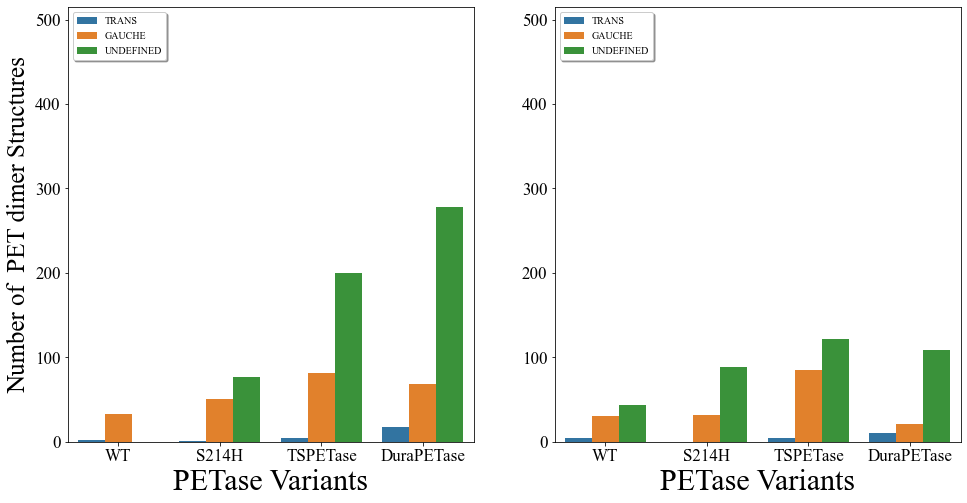

In [24]:
fig = plt.figure(figsize=(16,8))
plt.rcParams["font.family"] = "Times New Roman"
gs = fig.add_gridspec(1,2, hspace=0)
axs = gs.subplots(sharex=False, sharey=False)
g1 = sns.barplot(data=data_conf[(data_conf['Temperature'] == '303')], 
           x = 'Variants', y='Number of Structures', hue='Conformations', ax=axs[0])
g1.set(ylabel='Number of  PET dimer Structures')
g1.tick_params(labelsize=17)
g1.yaxis.label.set_size(25)
g1.legend(loc='upper left', shadow=True)
g1.set(xlabel='PETase Variants')
g1.xaxis.label.set_size(30)
g1.set_ylim(0, 515)
g2 = sns.barplot(data=data_conf[(data_conf['Temperature'] == '315')], 
           x = 'Variants', y='Number of Structures', hue='Conformations', ax=axs[1])
g2.yaxis.label.set_size(25)
g2.set(ylabel='')
g2.legend(loc='upper left', shadow=True)
g2.tick_params(labelsize=17)
g2.set(xlabel='PETase Variants')
g2.xaxis.label.set_size(30)
g2.set_ylim(0, 515)

plt.savefig('conformations.png')

plt.show()

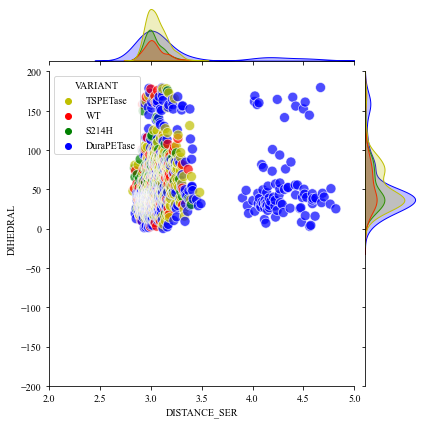

In [32]:
g = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['DISTANCE_SER'] )] , x="DISTANCE_SER" , y="DIHEDRAL", hue="VARIANT", palette=dict(DuraPETase="b",S214H = 'g', WT = 'r', TSPETase = 'y'),xlim=(2, 5), ylim=(-200, 200), s=100, alpha=.7 )   


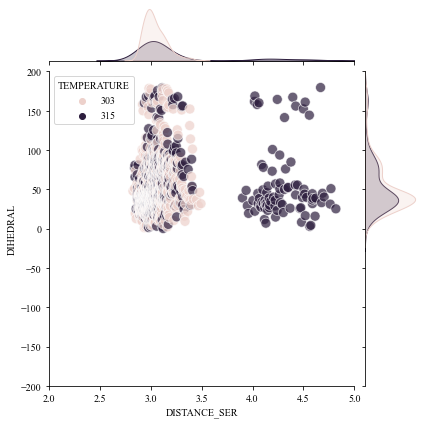

In [33]:
g = sns.jointplot(data=data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['DISTANCE_SER'] )] , x="DISTANCE_SER" , y="DIHEDRAL", hue="TEMPERATURE",xlim=(2, 5), ylim=(-200, 200), s=100, alpha=.7 )   


## Normalización de los datos

In [35]:
def normalizacion_data(data, variant, temperature, n):
    n_total = len(data[(data['VARIANT'] == variant) & (data['TEMPERATURE'] == temperature)])
    n_structures = len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == temperature) & (data['VARIANT'] == variant) & (data['DISTANCE_SER'] <= 3.5) & (data['DOCKING'] <= n)])
    normal = round(n_structures/n_total*100, 2)
    return normal

In [36]:
def data_norm(data):
    variants = []
    temperature = []
    docking = []
    perc = []
    var = ['WT', 'S214H', 'TSPETase', 'DuraPETase']
    temp = [303,315]
    dock = [3, 5, 10 , 20]
    for i in range(len(var)):
        for j in range(len(temp)):
            for k in range(len(dock)):
                variants.append(var[i])
                temperature.append(temp[j])
                docking.append(dock[k])
                perc.append(normalizacion_data(data,var[i],temp[j],dock[k]))
    df = pd.DataFrame(list(zip(variants, temperature, docking, perc)), columns =['Variant', 'Temperature', 'Docking', 'Percentage'])
    return df

In [37]:
data_per=data_norm(data)

In [38]:
## Comprobamos la length y el head de la data que hemos creado para ver que está todo correcto
data_per

,Variant,Temperature,Docking,Percentage
0,WT,303,3,2.37
1,WT,303,5,3.96
2,WT,303,10,8.18
3,WT,303,20,13.32
4,WT,315,3,2.26
5,WT,315,5,3.76
6,WT,315,10,7.37
7,WT,315,20,11.73
8,S214H,303,3,2.06
9,S214H,303,5,3.25


## Gráfico de los datos 

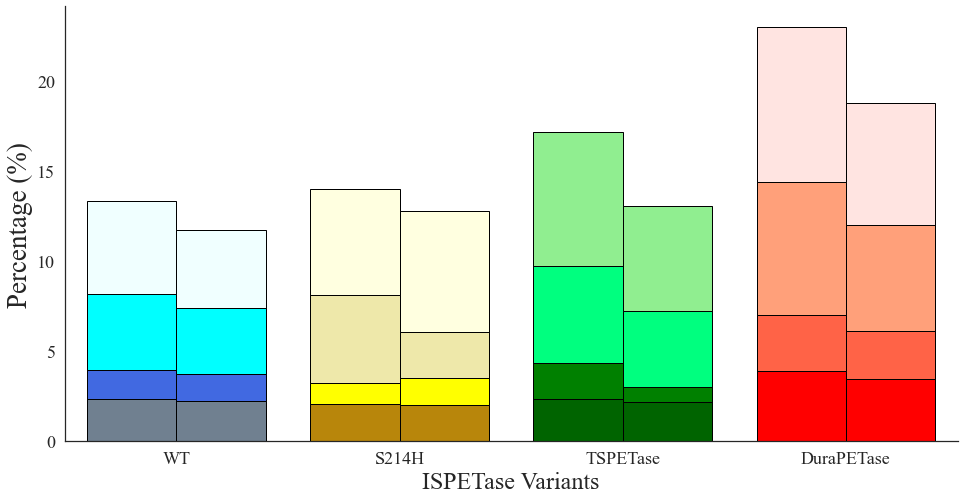

In [72]:

## Generamos las datas de interes

data_3 = data_per[(data_per['Docking'] == 3)]
data_5 = data_per[(data_per['Docking'] == 5)]
data_10 = data_per[(data_per['Docking'] == 10)]
data_20 = data_per[(data_per['Docking'] == 20)]

## Generamos los plots superpuestos

# Plot the total crashes
f, ax = plt.subplots(figsize=(16, 8))

plt.rcParams["font.family"] = "Times New Roman"



#Grafico del total
g1=sns.barplot(y="Percentage", x="Variant", hue='Temperature', data=data_20)
g1.get_legend().remove()
    
#Grafico de los 10 primeros dockings
g2=sns.barplot(y="Percentage", x="Variant", hue='Temperature', data=data_10)
sns.despine(left=True, bottom=True)
g2.get_legend().remove()    
    
#Grafico de los 5 primeros dockings
g3=sns.barplot(y="Percentage", x="Variant", hue='Temperature', data=data_5)
sns.despine(left=True, bottom=True)
g3.get_legend().remove() 

#Grafico de los 3 primeros dockings
Var_colors=["azure","lightyellow","lightgreen","mistyrose","azure","lightyellow","lightgreen","mistyrose",
           'cyan','palegoldenrod', 'springgreen', 'lightsalmon', 'cyan','palegoldenrod', 'springgreen', 'lightsalmon',
           'royalblue', 'yellow', 'green', 'tomato', 'royalblue', 'yellow', 'green', 'tomato',
           'slategray', 'darkgoldenrod', 'darkgreen', 'red',  'slategray', 'darkgoldenrod', 'darkgreen', 'red']
g4=sns.barplot(y="Percentage", x="Variant", hue='Temperature', data=data_3)
sns.despine(left=False, bottom=False)
for i, bar in enumerate(g3.patches):
    bar.set_color(Var_colors[i])
    bar.set_edgecolor('black')

## Poner arriba de cada barra la temperatura a la que pertenecen
    
    
g4.get_legend().remove()

plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('ISPETase Variants', size=24)
plt.ylabel('Percentage (%)', size=27)

plt.savefig('Percentage_docking.jpg')


In [124]:
print(len(data[ (data['VARIANT'] == 'DuraPETase') & (data['TEMPERATURE'] == 315)]))
print(len(data[ (data['VARIANT'] == 'DuraPETase') & (data['TEMPERATURE'] == 303)]))
print(len(data[ (data['VARIANT'] == 'TSPETase') & (data['TEMPERATURE'] == 303)]))
print(len(data[ (data['VARIANT'] == 'TSPETase') & (data['TEMPERATURE'] == 315)]))

751
1584
1668
1617


In [23]:
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315) & (data['VARIANT'] == 'WT') & (data['DISTANCE_SER'] <= 3.5) & (data['DOCKING'] <=5)]))
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315) & (data['VARIANT'] == 'S214H') & (data['DISTANCE_SER'] <= 3.5) & (data['DOCKING'] <=5)]))
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315) & (data['VARIANT'] == 'TSPETase')& (data['DISTANCE_SER'] <= 3.5) & (data['DOCKING'] <=5)]))
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 315) & (data['VARIANT'] == 'DuraPETase')& (data['DISTANCE_SER'] <= 3.5) & (data['DOCKING'] <=5)]))

25
33
49
46


In [24]:
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 303) & (data['VARIANT'] == 'WT')& (data['DISTANCE_SER'] <= 3.5)& (data['DOCKING'] <=5)]))
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 303) & (data['VARIANT'] == 'S214H')& (data['DISTANCE_SER'] <= 3.5)& (data['DOCKING'] <=5)]))
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 303) & (data['VARIANT'] == 'TSPETase')& (data['DISTANCE_SER'] <= 3.5)& (data['DOCKING'] <=5)]))
print(len(data[ (data["ENERGY"] < 0) & (data["MET"] == 'YES') & (data["TYR"] == 'YES') & (data['TEMPERATURE'] == 303) & (data['VARIANT'] == 'DuraPETase')& (data['DISTANCE_SER'] <= 3.5)& (data['DOCKING'] <=5)]))

30
30
72
111


<AxesSubplot:xlabel='DIHEDRAL', ylabel='Density'>

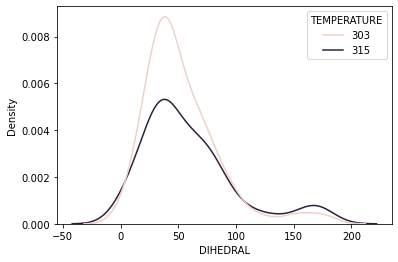

In [25]:
sns.kdeplot(data=data[(data['VARIANT']=='WT') & (data['DISTANCE_SER'] <= 3.5)], x="DIHEDRAL", hue='TEMPERATURE')

<AxesSubplot:xlabel='DIHEDRAL', ylabel='Density'>

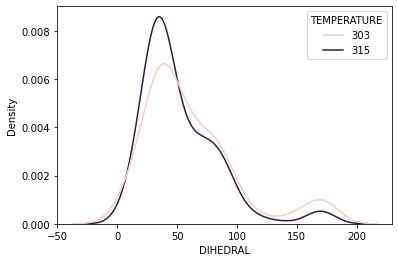

In [28]:
sns.kdeplot(data=data[(data['VARIANT']=='S214H') & (data['DISTANCE_SER'] <= 3.5)], x="DIHEDRAL", hue='TEMPERATURE')

<AxesSubplot:xlabel='DIHEDRAL', ylabel='Density'>

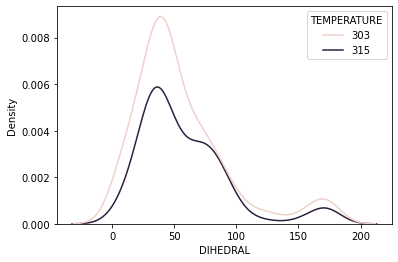

In [27]:
sns.kdeplot(data=data[(data['VARIANT']=='TSPETase') & (data['DISTANCE_SER'] <= 3.5)], x="DIHEDRAL", hue='TEMPERATURE')

<AxesSubplot:xlabel='DIHEDRAL', ylabel='Density'>

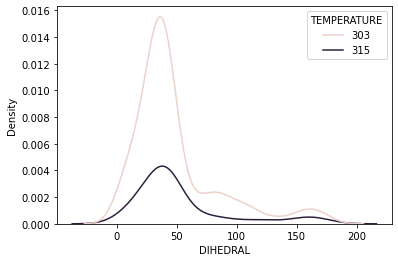

In [26]:
sns.kdeplot(data=data[(data['VARIANT']=='DuraPETase') & (data['DISTANCE_SER'] <= 3.5)], x="DIHEDRAL", hue='TEMPERATURE')